In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Data fields

For the bidder dataset

* **bidder_id** – Unique identifier of a bidder.
* **payment_account** – Payment account associated with a bidder. These are obfuscated to protect privacy. 
* **address** – Mailing address of a bidder. These are obfuscated to protect privacy. 
* **outcome** – Label of a bidder indicating whether or not it is a robot. Value **1.0 indicates a robot**, where value **0.0 indicates human**. 
The outcome was half hand labeled, half stats-based. There are two types of "bots" with different levels of proof:

For the bid dataset

* **bid_id** - unique id for this bid
* **bidder_id** – Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)
* **auction** – Unique identifier of an auction
* **merchandise** –  The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement. 
* **device** – Phone model of a visitor
* **time** - Time that the bid is made (transformed to protect privacy).
* **country** - The country that the IP belongs to
* **ip** – IP address of a bidder (obfuscated to protect privacy).
* **url** - url where the bidder was referred from (obfuscated to protect privacy). 

In [69]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# I merge them in order to expolore the whole data
dataset = train_data.append(test_data)

# let check what data columns we have
print("Train data: {}".format(train_data.shape))
print("Test data: {}".format(test_data.shape))

# now check the unique count
# everything seems to be unique here
print("bidder_id {}".format(train_data["bidder_id"].value_counts().max()))
print("payment_account {}".format(train_data["payment_account"].value_counts().max()))
print("address {}".format(train_data["address"].value_counts().max()))



Train data: (2013, 4)
Test data: (4700, 3)
bidder_id 1
payment_account 1
address 1


In [25]:
# warning this is ~1gb but yolo
# bids = pd.read_csv('bids.csv')

Bids shape is (7656334, 9)
Bids column : Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url'],
      dtype='object')
bid_id 1
bidder_id 515033
auction 537347


In [70]:
print("Bids shape is {}".format(bids.shape))

# lets find some data distribution

# It seems that each value inside bid_id is unique. (make sense since it is primary key)
print("bid_id {}".format(bids["bid_id"].value_counts().max()))
# there are a lot of bids made by those maybe they are bots
print("bidder_id head:\n{}".format(bids["bidder_id"].value_counts().head()))
print("\n")
# those have 1 bid
print("bidder_id tail:\n{}".format(bids["bidder_id"].value_counts().tail()))


Bids shape is (7656334, 9)
bid_id 1
bidder_id head:
f5b2bbad20d1d7ded3ed960393bec0f40u6hn    515033
197e90906939267ace2422e78e8e83889znqp    236413
a58ace8b671a7531c88814bc86b2a34cf0crb    192565
13b022681839a351f07d017c0edd9ed6ao2w5    168995
9655ccc7c0c193f1549475f02c54dce45kjw7    161935
Name: bidder_id, dtype: int64


bidder_id tail:
35f2af180d7711f705376a66165c4185e0gvy    1
58d47ff464082bf12a40e6494eeac5c7njk4z    1
483753c25facf00028067706fe7b2314i4ly9    1
c1bcce49b640e4a66e6d9b400a2c26ec1pxry    1
eeda0d135495167db9425fc5fa3a5e3ex2zel    1
Name: bidder_id, dtype: int64


In [73]:
def check_bot(bidder_id):
    return dataset[dataset["bidder_id"] == bidder_id]["outcome"]
# now check some bots
print(check_bot("f5b2bbad20d1d7ded3ed960393bec0f40u6hn"))
print(check_bot("197e90906939267ace2422e78e8e83889znqp"))
print(check_bot("a58ace8b671a7531c88814bc86b2a34cf0crb"))
print(check_bot("13b022681839a351f07d017c0edd9ed6ao2w5")) # it seems that this one is inside test data
print(check_bot("9655ccc7c0c193f1549475f02c54dce45kjw7")) # yay first bot


1823    0.0
Name: outcome, dtype: float64
1557    0.0
Name: outcome, dtype: float64
1870    0.0
Name: outcome, dtype: float64
3788   NaN
Name: outcome, dtype: float64
1512    1.0
Name: outcome, dtype: float64


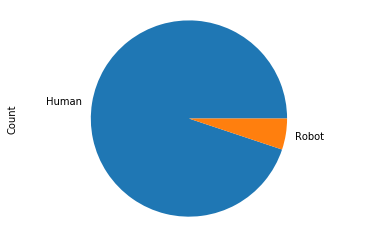

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,bidder_id,payment_account,address,outcome,bid_count
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0,181
50,9434778d2268f1fa2a8ede48c0cd05c097zey,ee3295c7b31a1e9116ebf0cf2df68ed1ac8ts,627fe7481f01372c02333477471cb237qt2vf,1.0,6540
51,aabc211b4cf4d29e4ac7e7e361371622pockb,a3d2de7675556553a5f08e4c88d2c228pxtr6,a3d2de7675556553a5f08e4c88d2c228bxn98,1.0,2048
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,a3d2de7675556553a5f08e4c88d2c228vf08k,767150cd5a97ed796bfc58456f5500250dsv7,1.0,281
77,1cbd9081de4481ada66f1853737f7684ddjd1,a3d2de7675556553a5f08e4c88d2c228buft1,a3d2de7675556553a5f08e4c88d2c228pijoz,1.0,1103
86,96b90af2d3eea4d3b2bc725e1c92e212qu52g,39ef2afbc0cde265550cafb40eb3fd8erzlrm,0e6dfa874409a90bc0fbf0d531475241cvw1o,1.0,6127
139,15972a431aed117840dfce5556242366c3fwq,4b5c8f52a678e51ebe0ee3fc26da66902e2l7,865e5987e0c8fc7f6301b5571d688d13pu5j1,1.0,340
148,efc61ad6db17265a4bac85f77b154ef414tpp,a3d2de7675556553a5f08e4c88d2c22850etl,a3d2de7675556553a5f08e4c88d2c228d6pnk,1.0,4
165,3d9910a238a0f282ad3132dd6fc981c8tv3tg,a3d2de7675556553a5f08e4c88d2c2281ehah,c856c4f51e949635cb567f7321bc0c6at1y78,1.0,923
199,1af4685cda2979a608c4b6ad83473774qgicn,e35a74340ac6d90fcb4fe9b84c6eaa2135wqx,ceda5914ce08b87ec934e614452442903j17m,1.0,6002


In [125]:
# what is the train outcome ratio?

human_count = train_data.loc[train_data["outcome"] == 0, "bidder_id"].count()
robot_count = train_data.loc[train_data["outcome"] == 1, "bidder_id"].count()

robot_human_ratio = pd.DataFrame({"Type": ["Human", "Robot"],
                                  "Count" : [human_count, robot_count]})

robot_human_ratio.Count.groupby(robot_human_ratio.Type).sum().plot(kind='pie')
plt.axis('equal')
plt.show()


# lets draw some plots to see how bidding count relates to beeing a robot
robots = train_data[train_data["outcome"] == 1]
bids_by_id = bids["bidder_id"].value_counts()

robots["bid_count"] = 0

def fill_bid_count(row):
    return bids_by_id[row["bidder_id"]]

robots["bid_count"] = robots.apply(fill_bid_count, axis= 1)
robots
